# Ejercicio 5 (Opcional) - XOR
Baje de los archivos al problema XOR. Grafique las clases. Observando el problema, indique cuál es el árbol más simple que clasifica correctamente todos los puntos. Aplique ahora un árbol con el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
sobre este problema, y explique el resultado obtenido.

### Árbol más simple que clasifica correctamente todos los puntos
Como primer paso del ejercicio, pensemos cual es el árbol más simple que clasifica correctamente a todos los puntos. 

Podemos ver claramente que las clases están perfectamente definidas por los cuadrantes del plano:
- El punto pertenece al primer o tercer cuadrante, si y sólo si es de la clase 0.
- El punto pertenece al segundo o cuarto cuadrante, si y sólo si es de la clase 1.

Para todos los puntos que pertenecen a cada uno de los semiejes cartesianos, podemos elegir si pertenecen a una clase o a la otra. No le daremos mucha importancia a ésto.

Podemos definir formalmente la idea de pertenencia a los cuadrantes. Sea $p(x,y)$ un punto del plano:
- $p$ pertenece al primer o tercer cuadrante, si y sólo si $(x > 0 \land y > 0) \lor (x < 0 \land y < 0)$.
- $p$ pertenece al segundo o cuarto cuadrante, si y sólo si $(x < 0 \land y > 0) \lor (x > 0 \land y < 0)$.

Resumiendo, podemos decir que:
- $p$ es de la clase 0, si y sólo si $(x > 0 \land y > 0) \lor (x < 0 \land y < 0)$.
- $p$ es de la clase 1, si y sólo si $(x < 0 \land y > 0) \lor (x > 0 \land y < 0)$.

Con todo ésto, podemos construir un árbol de decisión muy sencillo para clasificar los puntos.
- Preguntamos si $x > 0$:
  - Si es verdadero, preguntamos si $y>0$:
    - Si es verdadero, respondemos clase 0.
    - Si es falso, respondemos clase 1. 
  - Si es falso: preguntamos si $y>0$
    - Si es verdadero, respondemos clase 1.
    - Si es falso, respondemos clase 0.

Éste árbol de decisión que definimos, clasifica perfectamente los puntos y tiene una profundidad de dos niveles. Notemos que como nuestras preguntas son si $x>0$, que ésto sea falso implica que $x\le 0$. Ésto se relaciona con lo que mencionamos de analizar a que clase pertenece un punto que pertenecen a un determinado semieje cartesiano.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

[]

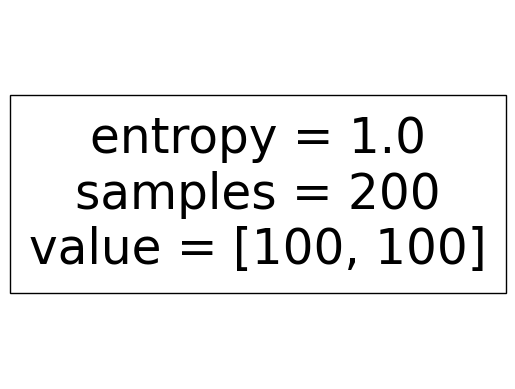

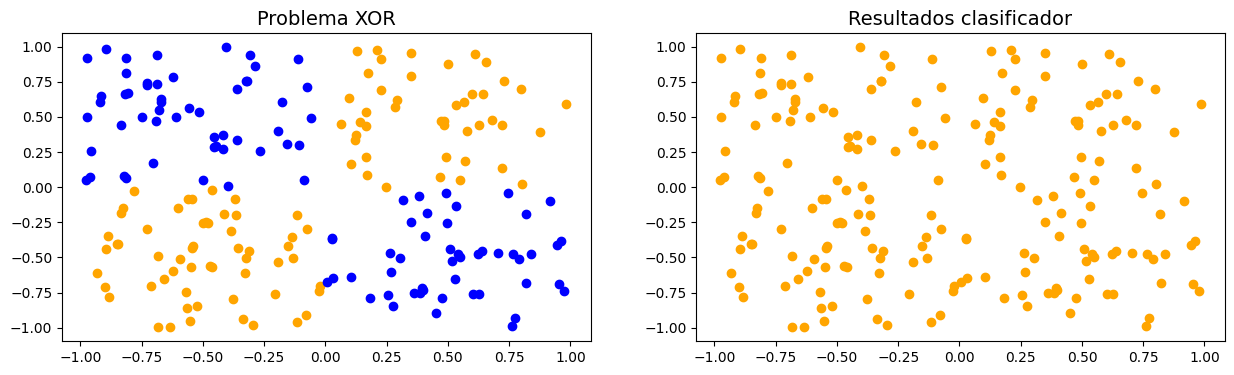

In [28]:
# Cargamos el archivo xor.csv como dataframe
xorDf = pd.read_csv('xor.csv', header=None)
xorDf.columns = ["x", "y", "target"]

# Creamos el X y el y
X = xorDf[["x", "y"]]
y = xorDf["target"]

# Creamos su classifier
xorClassifier = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

# ES NECESARIO HACER SPLIT? CHARLAR
# # Creamos un split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# print(len(X_train[y_train == 0]))
# print(len(X_train[y_train == 1]))

# Entrenamos sobre X_train
xorClassifier.fit(X, y)
tree.plot_tree(xorClassifier)

# Evaluamos en X_test y plotteamos ambas
y_predict = xorClassifier.predict(X)

# Separamos a los pares (x, y) de test en dos clases
X_test_class0 = X[y == 0] 
X_test_class1 = X[y == 1]  

# Y lo mismo pero considerando las predicciones
X_test_class0_pred = X[y_predict == 0] 
X_test_class1_pred = X[y_predict == 1]  

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
axes[0].scatter(X_test_class0["x"], X_test_class0["y"], color = "orange")
axes[0].scatter(X_test_class1["x"], X_test_class1["y"], color = "blue")
axes[0].set_title("Problema XOR", fontsize=14)

axes[1].scatter(X_test_class0_pred["x"], X_test_class0_pred["y"], color = "orange")
axes[1].scatter(X_test_class1_pred["x"], X_test_class1_pred["y"], color = "blue")
axes[1].set_title("Resultados clasificador", fontsize=14)

plt.plot()


### Explicaciones de los resultados obtenidos
Lo más notorio que podemos observar en los gráficos es que nuestro clasificador falla totalmente en dividir a los puntos entre las dos clases: asigna todos los puntos a la misma clase. 

La respuesta a ésto es inmediata si observamos la estructura de árbol de nuestro clasificador: cuenta con único nodo, que es la raíz. Es decir, no hace ninguna pregunta sobre algún atributo de los datos, como ver si un punto tiene mayor o menor abscisa que un determinado valor (como hicimos en nuestro clasificador simple).

Pero la pregunta importante es porqué el clasificador obtuvo esa estructura. La respuesta viene por el lado de nuestro clasificador no pudo encontrar ninguna *pregunta* sobre los atributos de nuestros datos, que aporte una información considerable para realizar una división en el árbol. Recordemos primero la definición matemática de **information gain** para un conjunto de datos **S** y atributo **A**, 
$$
\operatorname{Gain}(S,A) = \operatorname{Entropy}(S)- \sum_{v \in \operatorname{Values}(A)}\bigg( \frac{|S_v|}{|S|} \cdot \operatorname{Entropy}(S_v)\bigg).
$$
Y también recordemos la definición de **entropía** para un **problema de clasificación binario**, donde $p_+$ y $p_-$ denotan la proporción de elementos en las clases positiva y negativa respectivamente:
$$
\operatorname{Entropy}(S) = -p_+ \cdot \log_2 p_+ -p_- \cdot \log_2 p_-
$$

Ahora, sin pérdida de generalidad, consideremos que queremos analizar nuestro atributo $x$ del punto (para el caso de $y$ sería totalmente análogo). Como es un atributo continuo, consideremos un $k \in \mathbb R$ y discreticemos el atributo considerando si $x <= k$ o no (es decir, los valores son ahora *true* o *false*). Consideremos que estamos parados en el nodo raíz, y calculemos la ganancia de dividir nuestro conjunto a partir de dicho atributo:
$$
\operatorname{Gain}(S,\le k) = \operatorname{Entropy}(S)- \frac{|S_{true}|}{|S|} \cdot \operatorname{Entropy}(S_{true}) - \frac{|S_{false}|}{|S|} \cdot \operatorname{Entropy}(S_{false})
$$

Llamemos a $C$ como la cantidad de puntos $p(x,y)$ tales que $x \le k$, y como sabemos que tenemos un total de 200 puntos, podemos decir que $200 - C$ es la cantidad de puntos $p(x,y)$ tales que $x > k$. Entonces:

$$
\operatorname{Gain}(S,\le k) = \operatorname{Entropy}(S)- \frac{C}{200} \cdot \operatorname{Entropy}(S_{true}) - \frac{200 - C}{200} \cdot \operatorname{Entropy}(S_{false})
$$

La clave ahora es notar que, para cualquier valor de abcisa $k$ que utilicemos para separar al conjunto, la cantidad de puntos de cada clase a cada lado de la recta se mantiene aproximadamente igual. Teniendo esto en cuenta, y si analizamos $\operatorname{Entropy}(S_{true})$ y $\operatorname{Entropy}(S_{false})$, tenemos que ambos valores serán muy pŕoximos a 1, pues 

$$
\operatorname{Entropy}(S_{true}) = -p_+ \cdot \log_2 p_+ -p_- \cdot \log_2 p_- = \operatorname{Entropy}(S_{false}) 
$$

donde $-p_+ \approx \frac{1}{2}$ y $-p_- \approx \frac{1}{2}$, luego 
$$
- p_- \cdot \log_2 p_- \approx - p_+ \cdot \log_2 p_+ \approx -\frac{1}{2} \cdot \log_2 (\frac{1}{2}) = -\frac{1}{2} \cdot \log_2(2^{-1}) = \frac{1}{2} \cdot \log_2(2) = \frac{1}{2}
$$

por lo que $ - p_- \cdot \log_2 p_- + - p_+ \cdot \log_2 p_+ \approx 1$

Lo mismo pasará entonces con la entropía de $S$, ya que tenemos los 200 puntos iniciales divididos equitativamente entre las clases. Todo ésto nos lleva a que si consideramos:

$$
\begin{align}
\operatorname{Gain}(S, \leq k) &= \operatorname{Entropy}(S) - \frac{C}{200} \cdot \operatorname{Entropy}(S_{\text{true}}) - \frac{200 - C}{200} \cdot \operatorname{Entropy}(S_{\text{false}}) \\
&= 1 - \frac{C}{200} - \frac{200 - C}{200} \\
&= 1 - \frac{C}{200} - 1 + \frac{C}{200} \\
&= 0
\end{align}
$$

O sea, la ganancia de dividir a nuestro conjunto inicial es de 0, por lo que el algoritmo del clasificador decide no hacer ninguna división. Como ésto ocurre siempre, independientemente del valor $k$ que elijamos o si queríamos tomar el atributo $y$, el algoritmo nunca elige dividir por lo que llegamos a que nuestro clasificador cuenta únicamente con un nodo. 


- Si cambiamos los valores de los parámetros funca, o si aumentamos el número de puntos capaz.
- También andaría mejor si tenemos un desbalance entre las clases.